**PROJET ANALYSE DE DONNEES**
**Exploiter les spectres galactiques extraits du SDSS pour prédire certaines quantités physiques**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df = pd.read_csv("data/dataset.csv")

In [2]:
df.isnull().sum().sum()

np.int64(0)

In [3]:
# Désactiver toute limite d'affichage de colonnes
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)  # Largeur illimitée
pd.set_option("display.max_colwidth", None)  # Largeur de chaque cellule

# Afficher les 10 premières lignes avec toutes les colonnes visibles
df.head(20)

,objID,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specObjID,plate,mjd,fiberID,petroRad_u,petroRad_g,petroRad_r,petroRad_i,petroRad_z,petroFlux_u,petroFlux_g,petroFlux_r,petroFlux_i,petroFlux_z,petroR50_u,petroR50_g,petroR50_r,petroR50_i,petroR50_z,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,redshift,class
0,1237648704046760145,198.367594,-0.356065,20.73523,18.85085,17.56961,17.08212,16.70905,752,301,3,366,332185036042299392,295,51985,162,4.617126,5.115590,4.721174,4.684702,5.162075,3.511168,25.518180,81.353650,129.18770,190.042100,1.767043,2.110504,2.036932,2.053084,2.261010,22.04871,20.27086,19.04142,18.61768,18.16375,0.849854,0.809568,0.763818,0.783755,0.719075,0.211824,GALAXY
1,1237648704046760198,198.428206,-0.384406,18.44623,17.23412,16.67523,16.29652,16.07245,752,301,3,366,332189708966717440,295,51985,179,5.532878,5.589859,5.600729,5.354244,5.304190,39.659250,125.105900,213.186100,290.01280,336.886800,2.734408,2.734028,2.720730,2.576809,2.524137,20.34698,19.26615,18.67339,18.33171,18.01228,0.529245,0.550424,0.521570,0.512080,0.483037,0.094445,GALAXY
2,1237648704046760550,198.336859,-0.218801,24.57992,22.96763,22.21550,22.45372,22.82691,752,301,3,366,332194107013228544,295,51985,195,43.766610,2.969290,1.533155,2.969510,43.757050,-0.040059,0.630245,1.160457,0.94205,1.493814,-9999.000000,1.056316,0.807809,1.243051,1.968449,24.25974,23.27652,22.62379,22.95598,22.58121,0.050000,0.150042,0.058668,0.050000,0.050000,3.174457,QSO
3,1237648704046825622,198.462136,-0.219281,19.30241,17.78075,16.90307,16.49114,16.18247,752,301,3,367,332188609455089664,295,51985,175,3.748427,5.855546,5.567865,5.369811,5.497572,16.157750,85.047600,182.182200,258.82040,339.042700,1.568756,2.160283,1.937312,1.818147,1.914507,20.18672,18.81749,17.95659,17.52794,17.23053,0.731522,0.780879,0.822669,0.840207,0.817236,0.121077,GALAXY
4,1237648704046825624,198.466124,-0.254391,20.16626,18.28559,17.22367,16.79652,16.40390,752,301,3,367,332186685309741056,295,51985,168,27.912360,4.671544,5.251847,4.817436,5.149425,13.775220,48.896820,132.852300,193.47120,281.822400,4.686791,2.066747,2.102676,2.048219,2.177020,21.22759,19.41046,18.40081,18.00373,17.58257,0.885392,0.743277,0.761695,0.732215,0.685603,0.138055,GALAXY
5,1237648704046825654,198.493224,-0.256808,19.09543,17.31310,16.35899,15.97224,15.63603,752,301,3,367,332188884332996608,295,51985,176,43.755040,2.868777,2.852538,2.827901,2.873691,25.439210,110.268800,266.156300,377.89710,505.926100,1.837784,1.378804,1.331829,1.306797,1.313619,19.92144,18.18361,17.26347,16.89209,16.56325,0.864026,0.721934,0.673505,0.681313,0.728872,0.138718,GALAXY
6,1237648704046825668,198.501137,-0.350658,19.93487,17.91528,16.87629,16.43629,16.04760,752,301,3,367,332188334577182720,295,51985,174,5.004049,5.202849,5.323276,5.051919,4.989447,9.111118,63.099300,167.760400,244.89990,347.871900,1.890661,2.171092,2.200809,2.088027,2.154626,21.20330,19.24600,18.25201,17.83184,17.43041,0.682248,0.835638,0.818189,0.862818,0.833072,0.120911,GALAXY
7,1237648704046825700,198.539702,-0.323055,20.59683,18.82568,17.65636,17.23815,16.86611,752,301,3,367,332185585798113280,295,51985,164,3.369139,3.106019,2.947591,3.086313,4.476436,4.846580,27.627040,81.833170,121.30410,183.102600,1.322552,1.391850,1.354546,1.380181,1.518395,21.31700,19.66862,18.55658,18.15280,17.82260,0.649986,0.780085,0.836987,0.815756,0.773011,0.176991,GALAXY
8,1237648704046891095,198.701398,-0.412739,19.09171,16.93303,16.00233,15.63252,15.43036,752,301,3,368,332182012385323008,295,51985,151,1.978415,1.582088,1.540958,1.525437,1.482557,22.903200,163.617100,391.359400,548.31160,664.196000,0.966614,0.807051,0.799581,0.800798,0.778099,19.26635,17.16443,16.26453,15.89750,15.76437,0.327707,0.071175,0.104135,0.096623,0.191604,-0.000061,STAR
9,1237648704046891118,198.597214,-0.268027,22.05573,19.20698,17.76519,16.86842,16.38345,752,301,3,368,333353816885848064,296,51984,318,1.959352,1.342583,1.255820,1.263818,1.168554,1.590325,19.834540,74.842530,168.

objID, specObjID, fiberID : ce sont des identifiants uniques, sans signification physique. Ils n’apportent aucune information utile pour l’analyse ou la prédiction.

run, rerun, camcol, field, plate, mjd : ces colonnes décrivent des paramètres techniques liés à l’acquisition des données.
Elles sont pertinentes pour le suivi d'observation astronomique, mais n'ont pas de lien direct avec les propriétés physiques à prédire (redshift, class).

In [4]:
df = df.drop(columns=[
    "objID", "specObjID", "run", "rerun", "camcol", "field", 
    "plate", "mjd", "fiberID"
])

In [5]:
df

,ra,dec,u,g,r,i,z,petroRad_u,petroRad_g,petroRad_r,petroRad_i,petroRad_z,petroFlux_u,petroFlux_g,petroFlux_r,petroFlux_i,petroFlux_z,petroR50_u,petroR50_g,petroR50_r,petroR50_i,petroR50_z,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,redshift,class
0,198.367594,-0.356065,20.73523,18.85085,17.56961,17.08212,16.70905,4.617126,5.115590,4.721174,4.684702,5.162075,3.511168,25.518180,81.353650,129.18770,190.042100,1.767043,2.110504,2.036932,2.053084,2.261010,22.04871,20.27086,19.04142,18.61768,18.16375,0.849854,0.809568,0.763818,0.783755,0.719075,0.211824,GALAXY
1,198.428206,-0.384406,18.44623,17.23412,16.67523,16.29652,16.07245,5.532878,5.589859,5.600729,5.354244,5.304190,39.659250,125.105900,213.186100,290.01280,336.886800,2.734408,2.734028,2.720730,2.576809,2.524137,20.34698,19.26615,18.67339,18.33171,18.01228,0.529245,0.550424,0.521570,0.512080,0.483037,0.094445,GALAXY
2,198.336859,-0.218801,24.57992,22.96763,22.21550,22.45372,22.82691,43.766610,2.969290,1.533155,2.969510,43.757050,-0.040059,0.630245,1.160457,0.94205,1.493814,-9999.000000,1.056316,0.807809,1.243051,1.968449,24.25974,23.27652,22.62379,22.95598,22.58121,0.050000,0.150042,0.058668,0.050000,0.050000,3.174457,QSO
3,198.462136,-0.219281,19.30241,17.78075,16.90307,16.49114,16.18247,3.748427,5.855546,5.567865,5.369811,5.497572,16.157750,85.047600,182.182200,258.82040,339.042700,1.568756,2.160283,1.937312,1.818147,1.914507,20.18672,18.81749,17.95659,17.52794,17.23053,0.731522,0.780879,0.822669,0.840207,0.817236,0.121077,GALAXY
4,198.466124,-0.254391,20.16626,18.28559,17.22367,16.79652,16.40390,27.912360,4.671544,5.251847,4.817436,5.149425,13.775220,48.896820,132.852300,193.47120,281.822400,4.686791,2.066747,2.102676,2.048219,2.177020,21.22759,19.41046,18.40081,18.00373,17.58257,0.885392,0.743277,0.761695,0.732215,0.685603,0.138055,GALAXY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,221.715919,60.554155,20.18708,18.46829,17.67481,17.29626,17.03117,5.368145,3.824504,3.472500,3.595466,3.999542,8.455297,37.449210,76.195370,107.32740,141.009200,2.026476,1.794273,1.690633,1.679843,1.696334,20.95683,19.29097,18.52682,18.16759,17.96201,0.460413,0.837513,0.968729,0.931934,0.761002,0.066389,GALAXY
99996,221.666387,60.494297,19.74810,18.06337,17.22262,16.75258,16.42521,4.697951,5.384237,5.039444,4.949319,4.838073,11.688630,59.939440,129.369900,195.47150,268.302900,2.100041,2.328615,2.223360,2.185573,2.194117,20.83538,19.13280,18.31246,17.87767,17.61562,0.227486,0.253839,0.220897,0.228091,0.259607,0.050439,GALAXY
99997,221.639485,60.426037,20.01287,18.25470,17.27099,16.85114,16.55353,4.320285,3.985496,3.841360,3.747166,3.682514,10.269030,45.710690,112.572700,161.52980,211.831800,2.057776,1.836967,1.760538,1.715240,1.630440,20.88857,19.11127,18.12537,17.72667,17.50033,0.845601,0.817504,0.805515,0.793216,0.831405,0.137509,GALAXY
99998,221.593465,60.360035,18.81318,17.74193,17.24234,16.88797,16.72201,2.969457,4.747078,4.661624,4.625072,4.198471,40.688590,83.570300,133.197300,178.24560,201.789200,3.054872,2.267780,2.200719,2.140601,2.039941,19.82649,18.80623,18.25634,17.95367,17.90519,0.419370,0.507525,0.487915,0.505701,0.471194,0.066688,GALAXY


### Nettoyage des valeurs aberrantes

Dans le jeu de données SDSS, on peut observer (notamment les magnitudes `psfMag_*`) peuvent contenir la valeur `-9999`, utilisée comme indicateur de données manquantes ou invalides. Ces valeurs sont considérées comme **aberrantes** car elles n'ont aucune signification physique réaliste dans le contexte des magnitudes apparentes.

Afin de garantir la qualité des prédictions, il est indispensable de **supprimer toutes les lignes contenant de telles valeurs** avant l'entraînement du modèle. Ce nettoyage évite d'introduire du bruit ou des biais dans l'apprentissage automatique.


In [6]:
# Supprimer les lignes contenant -9999 dans les colonnes
df = df[~df.isin([-9999, -9999.0, -9999.00000]).any(axis=1)]
df

,ra,dec,u,g,r,i,z,petroRad_u,petroRad_g,petroRad_r,petroRad_i,petroRad_z,petroFlux_u,petroFlux_g,petroFlux_r,petroFlux_i,petroFlux_z,petroR50_u,petroR50_g,petroR50_r,petroR50_i,petroR50_z,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,redshift,class
0,198.367594,-0.356065,20.73523,18.85085,17.56961,17.08212,16.70905,4.617126,5.115590,4.721174,4.684702,5.162075,3.511168,25.518180,81.353650,129.1877,190.0421,1.767043,2.110504,2.036932,2.053084,2.261010,22.04871,20.27086,19.04142,18.61768,18.16375,0.849854,0.809568,0.763818,0.783755,0.719075,0.211824,GALAXY
1,198.428206,-0.384406,18.44623,17.23412,16.67523,16.29652,16.07245,5.532878,5.589859,5.600729,5.354244,5.304190,39.659250,125.105900,213.186100,290.0128,336.8868,2.734408,2.734028,2.720730,2.576809,2.524137,20.34698,19.26615,18.67339,18.33171,18.01228,0.529245,0.550424,0.521570,0.512080,0.483037,0.094445,GALAXY
3,198.462136,-0.219281,19.30241,17.78075,16.90307,16.49114,16.18247,3.748427,5.855546,5.567865,5.369811,5.497572,16.157750,85.047600,182.182200,258.8204,339.0427,1.568756,2.160283,1.937312,1.818147,1.914507,20.18672,18.81749,17.95659,17.52794,17.23053,0.731522,0.780879,0.822669,0.840207,0.817236,0.121077,GALAXY
4,198.466124,-0.254391,20.16626,18.28559,17.22367,16.79652,16.40390,27.912360,4.671544,5.251847,4.817436,5.149425,13.775220,48.896820,132.852300,193.4712,281.8224,4.686791,2.066747,2.102676,2.048219,2.177020,21.22759,19.41046,18.40081,18.00373,17.58257,0.885392,0.743277,0.761695,0.732215,0.685603,0.138055,GALAXY
5,198.493224,-0.256808,19.09543,17.31310,16.35899,15.97224,15.63603,43.755040,2.868777,2.852538,2.827901,2.873691,25.439210,110.268800,266.156300,377.8971,505.9261,1.837784,1.378804,1.331829,1.306797,1.313619,19.92144,18.18361,17.26347,16.89209,16.56325,0.864026,0.721934,0.673505,0.681313,0.728872,0.138718,GALAXY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,221.715919,60.554155,20.18708,18.46829,17.67481,17.29626,17.03117,5.368145,3.824504,3.472500,3.595466,3.999542,8.455297,37.449210,76.195370,107.3274,141.0092,2.026476,1.794273,1.690633,1.679843,1.696334,20.95683,19.29097,18.52682,18.16759,17.96201,0.460413,0.837513,0.968729,0.931934,0.761002,0.066389,GALAXY
99996,221.666387,60.494297,19.74810,18.06337,17.22262,16.75258,16.42521,4.697951,5.384237,5.039444,4.949319,4.838073,11.688630,59.939440,129.369900,195.4715,268.3029,2.100041,2.328615,2.223360,2.185573,2.194117,20.83538,19.13280,18.31246,17.87767,17.61562,0.227486,0.253839,0.220897,0.228091,0.259607,0.050439,GALAXY
99997,221.639485,60.426037,20.01287,18.25470,17.27099,16.85114,16.55353,4.320285,3.985496,3.841360,3.747166,3.682514,10.269030,45.710690,112.572700,161.5298,211.8318,2.057776,1.836967,1.760538,1.715240,1.630440,20.88857,19.11127,18.12537,17.72667,17.50033,0.845601,0.817504,0.805515,0.793216,0.831405,0.137509,GALAXY
99998,221.593465,60.360035,18.81318,17.74193,17.24234,16.88797,16.72201,2.969457,4.747078,4.661624,4.625072,4.198471,40.688590,83.570300,133.197300,178.2456,201.7892,3.054872,2.267780,2.200719,2.140601,2.039941,19.82649,18.80623,18.25634,17.95367,17.90519,0.419370,0.507525,0.487915,0.505701,0.471194,0.066688,GALAXY


## Répartition des classes d'objets célestes

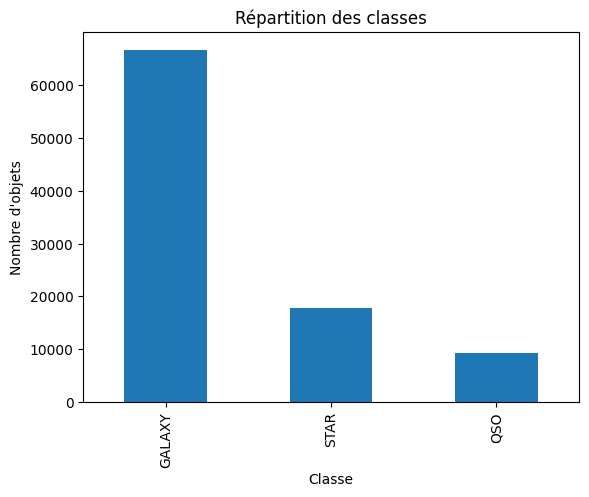

In [7]:

df["class"].value_counts().plot(kind="bar", title="Répartition des classes")
plt.xlabel("Classe")
plt.ylabel("Nombre d'objets")
plt.show()

Le graphique ci-dessous montre la répartition des classes présentes dans notre jeu de données (`class`).  
On observe une **forte majorité de galaxies (GALAXY)**, suivies par des étoiles (`STAR`) et enfin des quasars (`QSO`).  

Ce **déséquilibre important** doit être pris en compte si l'on construit un modèle de classification, au risque de biaiser les prédictions en faveur de la classe dominante.

| Classe | Nombre d’exemples |
|--------|--------------------|
| GALAXY | ~70 000            |
| STAR   | ~20 000            |
| QSO    | ~10 000            |


### Distribution du redshift


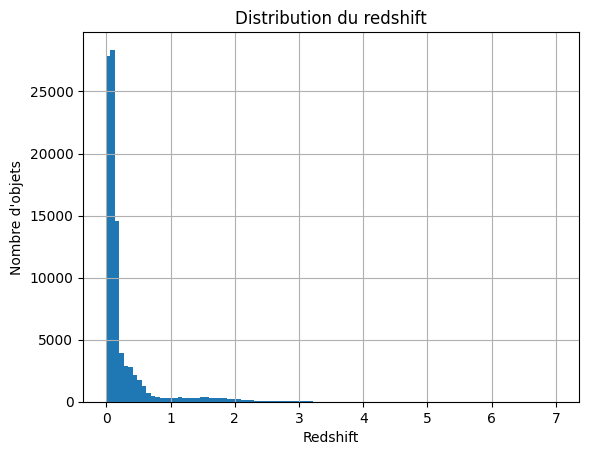

In [8]:
df["redshift"].hist(bins=100)
plt.title("Distribution du redshift")
plt.xlabel("Redshift")
plt.ylabel("Nombre d'objets")
plt.show()


Le graphique ci-dessus montre la distribution de la variable `redshift`, qui mesure le décalage spectral des objets célestes (lié à leur distance et à l’expansion de l’univers).

On observe une **forte concentration autour de 0** : la majorité des objets sont proches de la Terre.  
Quelques cas rares présentent un redshift élevé (souvent > 2), typiques de **quasars très lointains**.

#### Conséquences pour l’analyse :
- La régression risque d’être **biaisée vers les petites valeurs** si l’on ne traite pas ce déséquilibre.
- Il peut être judicieux de **transformer le redshift** (ex. logarithme, normalisation) ou de **filtrer les extrêmes**, en fonction de l’objectif du modèle.


### Distribution du redshift par classe

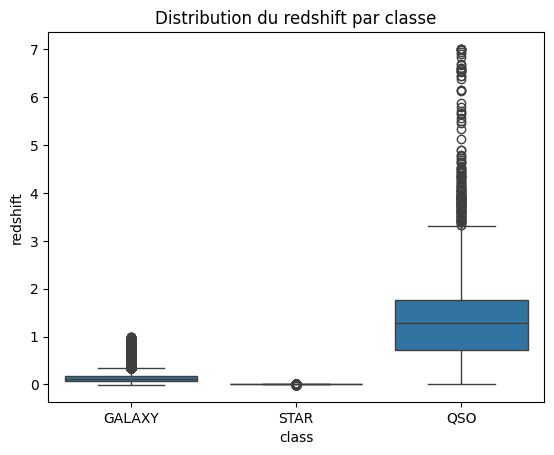

In [9]:
sns.boxplot(x="class", y="redshift", data=df)
plt.title("Distribution du redshift par classe")
plt.show()

Ce boxplot compare la distribution du `redshift` selon les trois classes d’objets célestes (`GALAXY`, `STAR`, `QSO`) :

- Les **étoiles (STAR)** ont un redshift quasi nul, ce qui est attendu puisqu’elles appartiennent à notre galaxie.
- Les **galaxies (GALAXY)** présentent un redshift modéré, généralement inférieur à 0.5.
- Les **quasars (QSO)** ont des redshifts nettement plus élevés, souvent supérieurs à 1, avec une large variabilité. Ce sont des objets très lointains.

#### Interprétation :
- Ce graphique confirme que le `redshift` est une **variable discriminante** entre les classes.
- Il justifie le **filtrage des étoiles** dans un modèle de régression du redshift, puisqu’elles n’apportent pas de diversité utile (toujours proche de 0).



### Matrice de corrélation

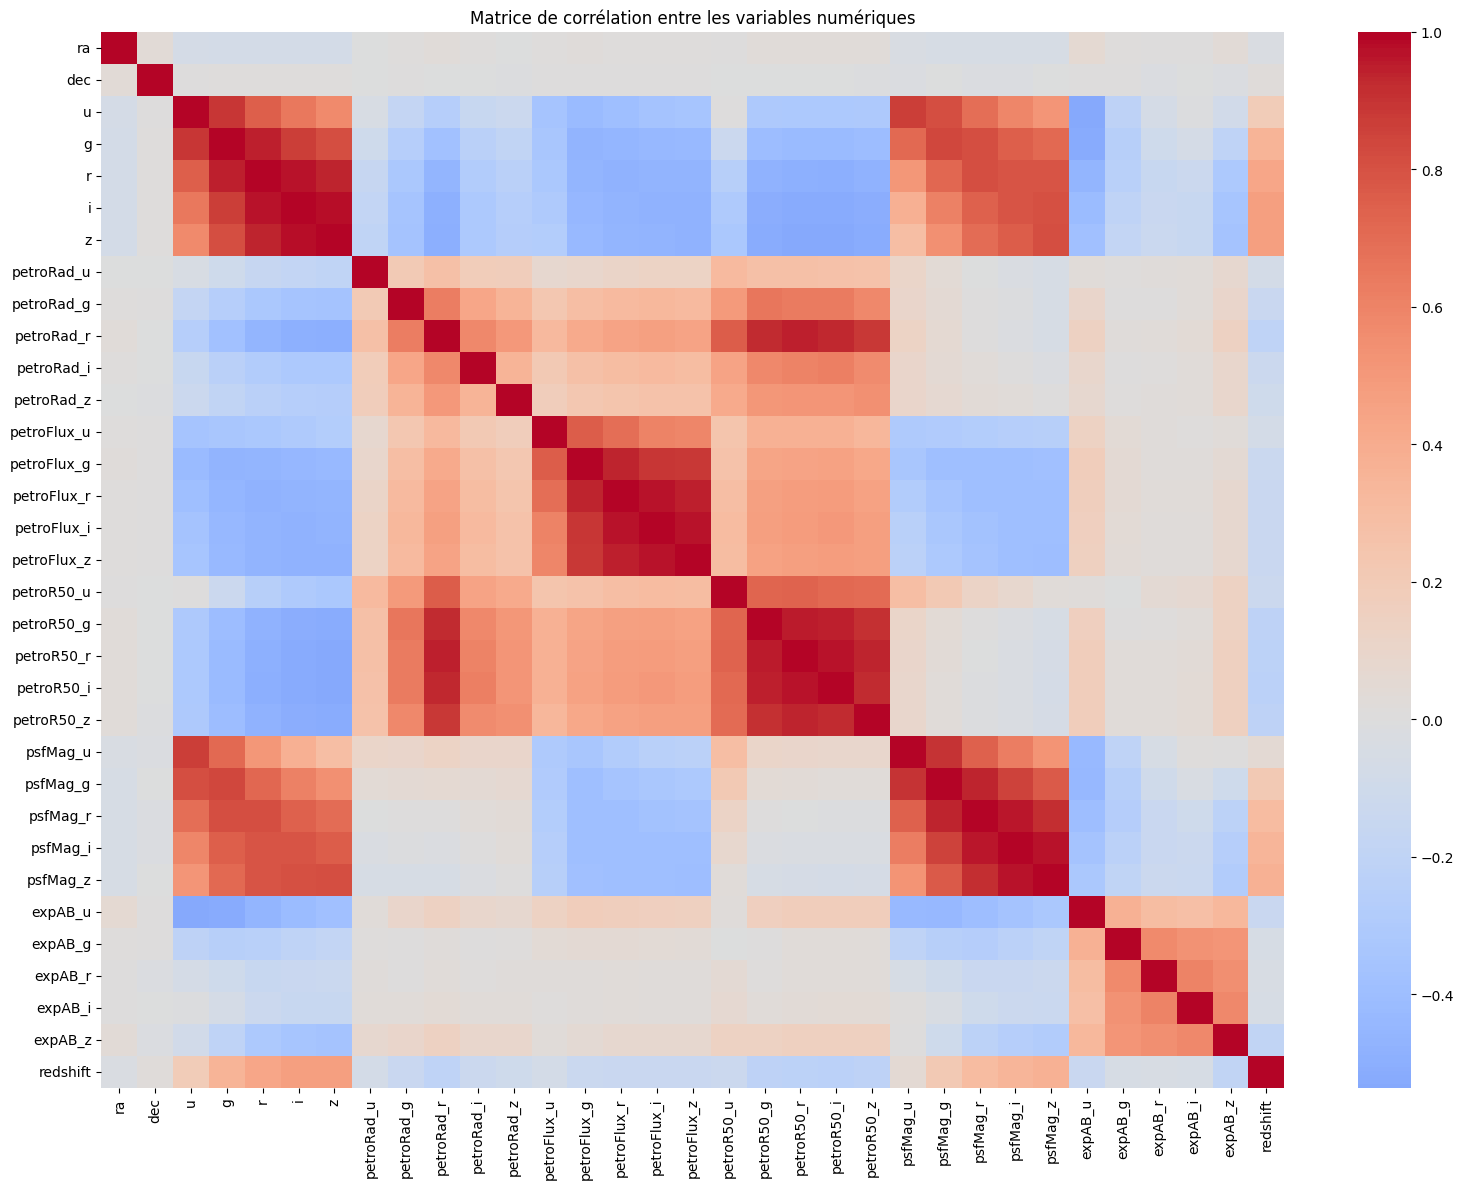

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# On ne garde que les colonnes numériques
numeric_df = df.select_dtypes(include=["float64", "int64"])

# Calcul de la matrice de corrélation
corr_matrix = numeric_df.corr()

# Affichage de la heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, center=0)
plt.title("Matrice de corrélation entre les variables numériques")
plt.tight_layout()
plt.show()


Cette matrice de corrélation, calculée uniquement sur les variables physiques (après suppression des colonnes techniques), met en évidence plusieurs points clés :
- Les magnitudes (`u`, `g`, `r`, `i`, `z`) et les flux (`petroFlux_*`) sont fortement corrélés entre eux, ce qui confirme leur redondance partielle.
- Le `redshift` n’est fortement corrélé à aucune variable individuelle, ce qui suggère que la relation entre les caractéristiques physiques et le décalage spectral est complexe et non linéaire.
- Les variables les plus corrélées négativement à `redshift` sont `petroRad_r`, `petroFlux_i`, `petroFlux_g`, `psfMag_r`, ce qui justifie leur utilisation dans un modèle de régression.
- Les variables de forme (`expAB_*`) sont très corrélées entre elles, mais peu liées au redshift — leur utilité sera à vérifier empiriquement lors de l'entraînement.

Cette analyse nous permet de mieux sélectionner les variables pertinentes et d’envisager, si besoin, des techniques de réduction de dimension ou de régularisation pour éviter les redondances.


### Corrélation entre les variables et le redshift


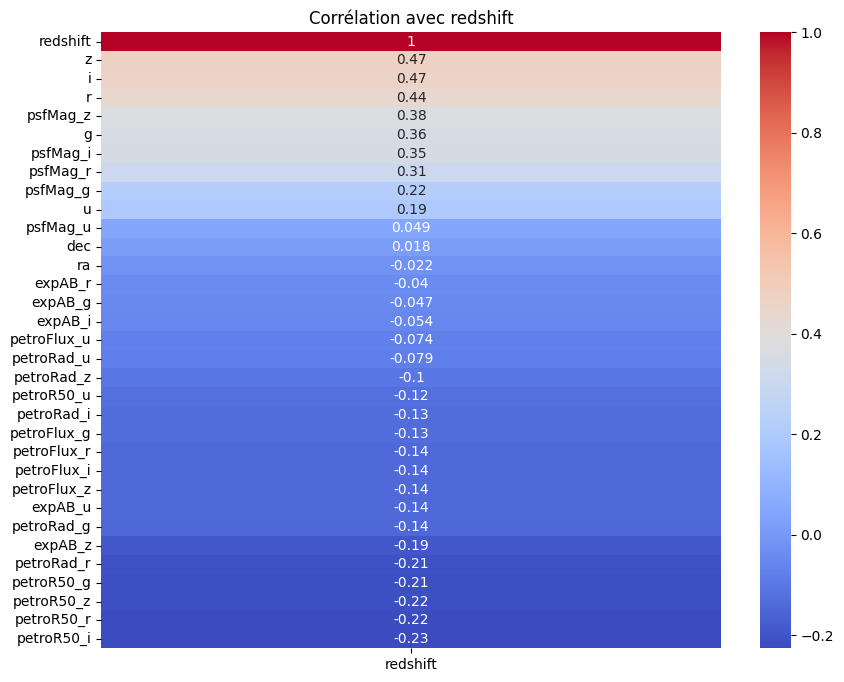

In [11]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr[["redshift"]].sort_values("redshift", ascending=False), annot=True, cmap="coolwarm")
plt.title("Corrélation avec redshift")
plt.show()


Cette heatmap montre la corrélation linéaire de chaque variable avec le `redshift`. Les valeurs proches de +1 indiquent une forte corrélation positive, tandis que celles proches de -1 indiquent une corrélation négative.

#### Principales observations :
- Les variables **`z`**, **`i`** et **`r`** (magnitudes classiques) sont les **plus corrélées positivement** avec le redshift (≈ 0.44 à 0.47).
- Les **magnitudes PSF** sont aussi corrélées, mais un peu moins (max ≈ 0.38 pour `psfMag_z`).
- Les autres variables (flux, rayons, positions, excentricité…) montrent une **corrélation faible voire négative**, suggérant qu'elles sont moins informatives pour la prédiction du redshift.

### Nuage de points

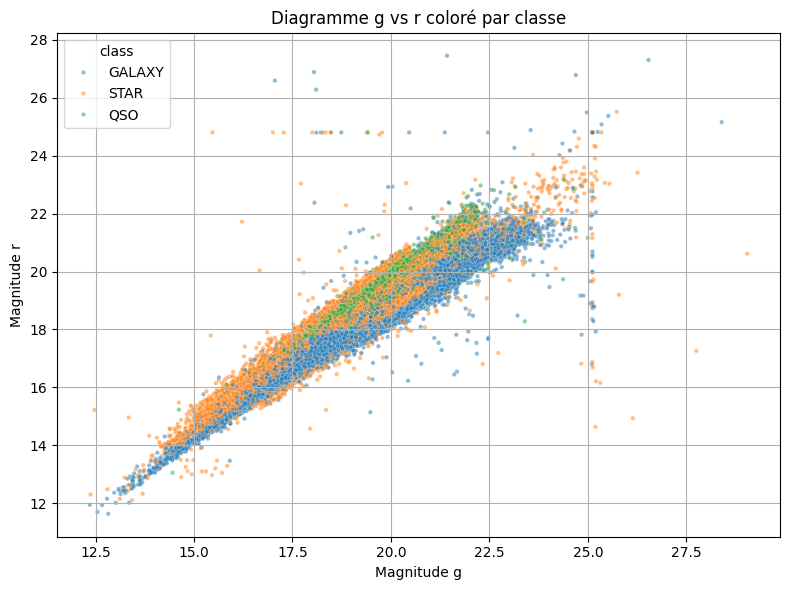

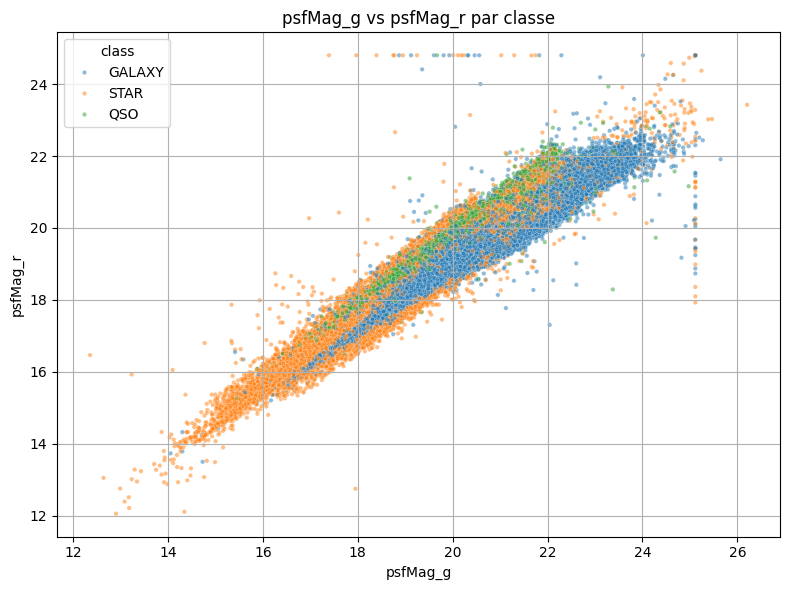

In [12]:
# 1. Nuage de points : g vs r
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="g", y="r", hue="class", alpha=0.5, s=10)
plt.title("Diagramme g vs r coloré par classe")
plt.xlabel("Magnitude g")
plt.ylabel("Magnitude r")
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Nuage de points : psfMag_g vs psfMag_r 
if "psfMag_g" in df.columns and "psfMag_r" in df.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x="psfMag_g", y="psfMag_r", hue="class", alpha=0.5, s=10)
    plt.title("psfMag_g vs psfMag_r par classe")
    plt.xlabel("psfMag_g")
    plt.ylabel("psfMag_r")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Les deux diagrammes de dispersion ci-dessus illustrent la relation entre les magnitudes dans les bandes `g` et `r`, en utilisant d’une part les magnitudes classiques (`g`, `r`) et d’autre part les magnitudes PSF (`psfMag_g`, `psfMag_r`), le tout coloré par classe (`GALAXY`, `STAR`, `QSO`).

On observe une forte **corrélation linéaire** dans les deux cas : les objets brillants dans la bande `g` le sont aussi dans la bande `r`. Toutefois, la manière dont les classes se distribuent révèle des différences intéressantes.

Les **étoiles (`STAR`)** sont plus compactes et bien alignées dans le nuage PSF, ce qui est logique car les magnitudes PSF sont optimisées pour les sources ponctuelles. À l’inverse, les **galaxies (`GALAXY`)** et les **quasars (`QSO`)**, qui sont des objets étendus ou complexes, montrent une dispersion plus marquée, en particulier avec les magnitudes classiques.

Ces visualisations confirment que :
- Les magnitudes `psfMag_*` sont plus adaptées à la modélisation des étoiles.
- Les magnitudes classiques `g`, `r` donnent une meilleure représentation des objets étendus comme les galaxies et quasars.
- Le choix des features doit être ajusté en fonction de la nature des objets pour une modélisation efficace.



### Choix des magnitudes en fonction du type d'objet

- Pour les **étoiles** (`STAR`), nous utilisons les magnitudes `psfMag_*`, car elles supposent une source ponctuelle et s’adaptent parfaitement à la forme des étoiles.
- Pour les **galaxies** et **quasars** (`GALAXY`, `QSO`), nous préférons les magnitudes classiques `u`, `g`, `r`, `i`, `z`, car elles mesurent plus fidèlement le flux total des objets étendus.

Ce choix améliore la cohérence physique des données utilisées pour l'entraînement.

In [13]:
#Creation data set

# Séparer selon la classe
df_star = df[df["class"] == "STAR"]
df_other = df[df["class"].isin(["GALAXY", "QSO"])]

# Définir les features
features_star = ["psfMag_u", "psfMag_g", "psfMag_i", "psfMag_z"]
features_other = ["u", "g", "r", "i", "z"]

# Préparation des données pour redshift
X_star = df_star[features_star]
y_star_redshift = df_star["redshift"]

X_other = df_other[features_other]
y_other_redshift = df_other["redshift"]

# Préparation des données pour magnitude apparente (psfMag_r)
y_star_mag = df_star["psfMag_r"]
y_other_mag = df_other["psfMag_r"]



In [14]:
# Séparation train/test
X_train_s, X_test_s, y_train_s_r, y_test_s_r = train_test_split(X_star, y_star_redshift, test_size=0.2, random_state=42)
_, _, y_train_s_m, y_test_s_m = train_test_split(X_star, y_star_mag, test_size=0.2, random_state=42)

X_train_o, X_test_o, y_train_o_r, y_test_o_r = train_test_split(X_other, y_other_redshift, test_size=0.2, random_state=42)
_, _, y_train_o_m, y_test_o_m = train_test_split(X_other, y_other_mag, test_size=0.2, random_state=42)


In [15]:
# Modèles pour redshift
model_star_redshift = RandomForestRegressor(n_estimators=100, random_state=42)
model_other_redshift = RandomForestRegressor(n_estimators=100, random_state=42)

# Modèles pour magnitude apparente
model_star_mag = RandomForestRegressor(n_estimators=100, random_state=42)
model_other_mag = RandomForestRegressor(n_estimators=100, random_state=42)

In [16]:
# Entraînement
model_star_redshift.fit(X_train_s, y_train_s_r)
model_other_redshift.fit(X_train_o, y_train_o_r)

model_star_mag.fit(X_train_s, y_train_s_m)
model_other_mag.fit(X_train_o, y_train_o_m)



RandomForestRegressor(random_state=42)

In [17]:
# Prédictions
y_pred_s_r = model_star_redshift.predict(X_test_s)
y_pred_o_r = model_other_redshift.predict(X_test_o)

y_pred_s_m = model_star_mag.predict(X_test_s)
y_pred_o_m = model_other_mag.predict(X_test_o)


In [18]:
# Évaluation
results = {
    "STAR - Redshift": {
        "MSE": mean_squared_error(y_test_s_r, y_pred_s_r),
        "R²": r2_score(y_test_s_r, y_pred_s_r)
    },
    "STAR - psfMag_r": {
        "MSE": mean_squared_error(y_test_s_m, y_pred_s_m),
        "R²": r2_score(y_test_s_m, y_pred_s_m)
    },
    "GALAXY+QSO - Redshift": {
        "MSE": mean_squared_error(y_test_o_r, y_pred_o_r),
        "R²": r2_score(y_test_o_r, y_pred_o_r)
    },
    "GALAXY+QSO - psfMag_r": {
        "MSE": mean_squared_error(y_test_o_m, y_pred_o_m),
        "R²": r2_score(y_test_o_m, y_pred_o_m)
    }
}

results

{'STAR - Redshift': {'MSE': 2.2412130119174574e-07,
  'R²': -0.09245234110938738},
 'STAR - psfMag_r': {'MSE': 0.09028613971621688, 'R²': 0.969087138625399},
 'GALAXY+QSO - Redshift': {'MSE': 0.06584172255973784,
  'R²': 0.7271448537178591},
 'GALAXY+QSO - psfMag_r': {'MSE': 0.140568235902988, 'R²': 0.8614830761889248}}

### Vérité vs Prédiction

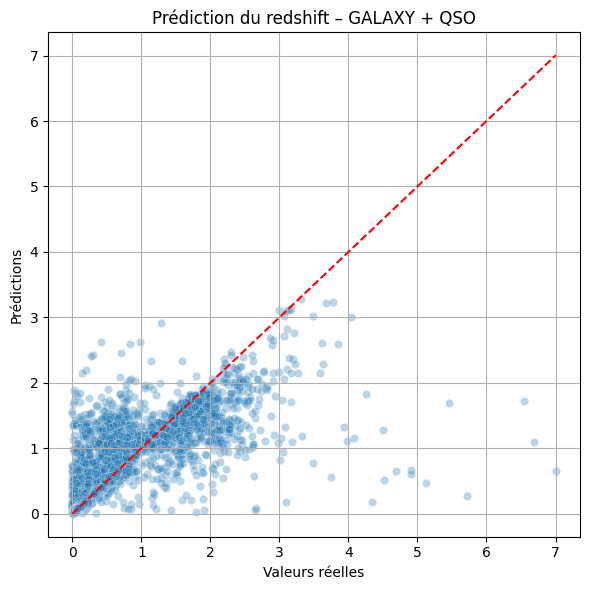

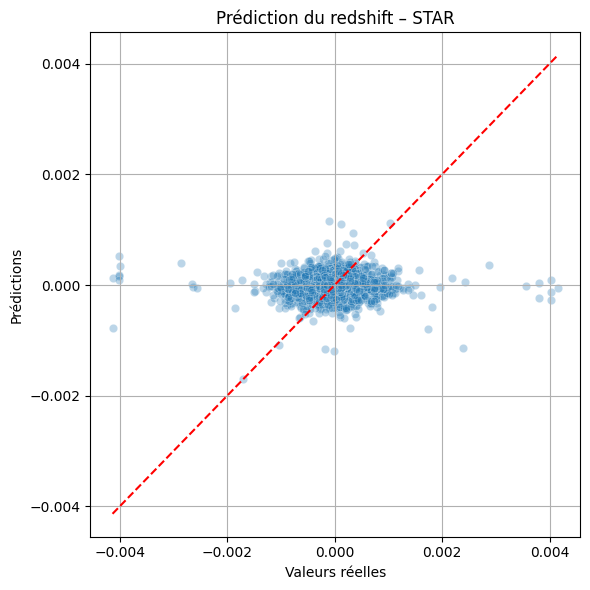

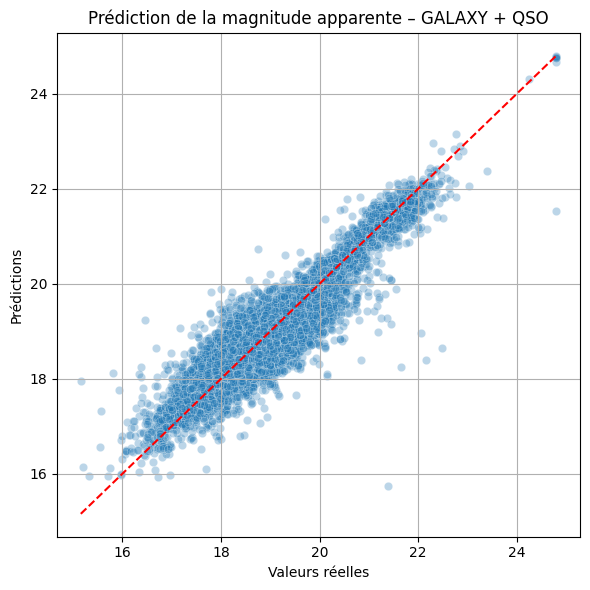

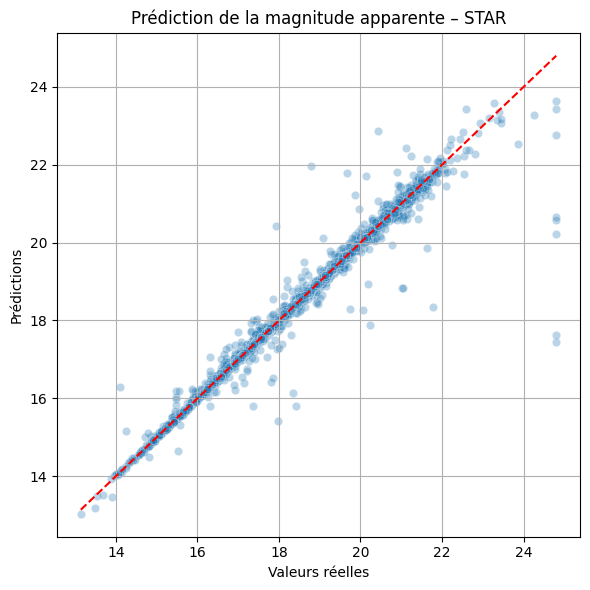

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_predictions(y_true, y_pred, title):
    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=y_true, y=y_pred, alpha=0.3)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
    plt.xlabel("Valeurs réelles")
    plt.ylabel("Prédictions")
    plt.title(title)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Exemple : Redshift pour GALAXY+QSO
plot_predictions(y_test_o_r, y_pred_o_r, "Prédiction du redshift – GALAXY + QSO")
# Exemple : Redshift pour STAR
plot_predictions(y_test_s_r, y_pred_s_r, "Prédiction du redshift – STAR")
# Exemple : Magnitude pour GALAXY+QSO
plot_predictions(y_test_o_m, y_pred_o_m, "Prédiction de la magnitude apparente – GALAXY + QSO")
# Exemple : Magnitude pour STAR
plot_predictions(y_test_s_m, y_pred_s_m, "Prédiction de la magnitude apparente – STAR")


#### Interprétation :

- La **prédiction du redshift** pour les objets `GALAXY + QSO` présente une dispersion importante, notamment pour les objets ayant un redshift élevé (> 2). Le modèle a tendance à **sous-estimer les valeurs élevées**, ce qui peut s’expliquer par le fait que la majorité des observations ont un redshift faible. La diagonale est bien suivie pour les redshifts < 1, mais les prédictions deviennent de moins en moins précises au-delà.

- Pour les **étoiles (`STAR`)**, la prédiction du redshift est extrêmement concentrée autour de zéro. Cela est **normal**, car les étoiles sont situées dans notre galaxie et leur redshift est négligeable. Le modèle reproduit fidèlement cette faible variabilité, mais l’échelle des valeurs est si petite que le **score R²** devient peu représentatif.

- Concernant la **magnitude apparente**, les résultats sont très satisfaisants pour les deux catégories :
  - Pour `GALAXY + QSO`, les prédictions suivent bien la diagonale, malgré une légère dispersion autour des valeurs élevées.
  - Pour `STAR`, la corrélation est encore meilleure. Les points sont **très bien alignés** sur la diagonale, ce qui traduit une excellente précision du modèle. Cela reflète à nouveau la régularité et la stabilité des étoiles, bien capturées par les magnitudes PSF.

### Distribution des erreurs

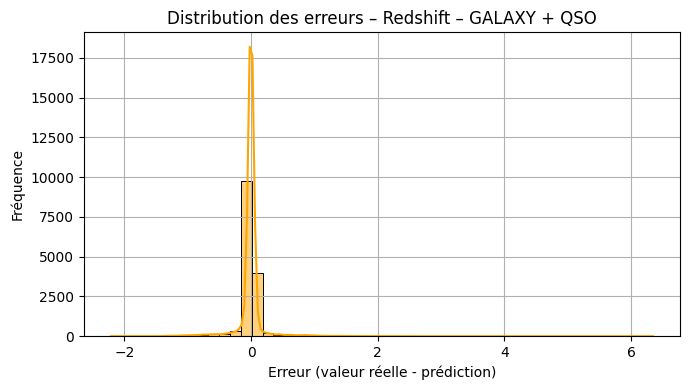

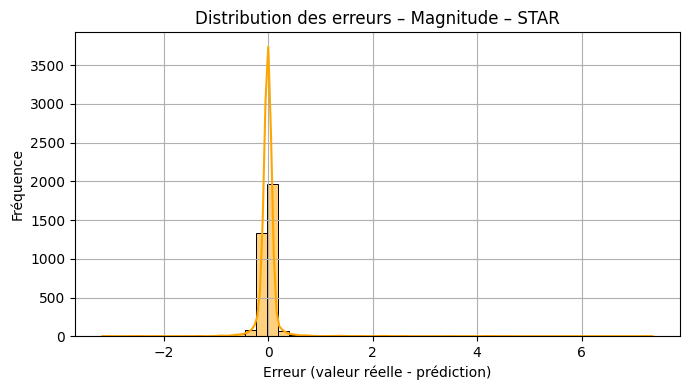

In [20]:
def plot_error_distribution(y_true, y_pred, title):
    errors = y_true - y_pred
    plt.figure(figsize=(7, 4))
    sns.histplot(errors, bins=50, kde=True, color="orange")
    plt.title(f"Distribution des erreurs – {title}")
    plt.xlabel("Erreur (valeur réelle - prédiction)")
    plt.ylabel("Fréquence")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Exemple : Redshift pour GALAXY+QSO
plot_error_distribution(y_test_o_r, y_pred_o_r, "Redshift – GALAXY + QSO")

# Exemple : Magnitude pour STAR
plot_error_distribution(y_test_s_m, y_pred_s_m, "Magnitude – STAR")


#### Analyse :

- Dans les deux cas, la majorité des erreurs sont **centrées autour de zéro**, ce qui est un bon signe : cela indique que les modèles ne présentent pas de biais systématique important.
- Le modèle pour les **étoiles** montre une distribution **très resserrée**, avec peu d’erreurs extrêmes, ce qui reflète sa précision.
- En revanche, la distribution des erreurs pour le **redshift des galaxies et quasars** est plus **étalée**, avec quelques cas où l'erreur dépasse 2. Cela confirme que la prédiction du redshift est plus complexe, en particulier pour les objets lointains.

Les pics étroits et symétriques indiquent que les modèles apprennent des tendances claires, mais que la qualité varie selon la complexité de la cible.


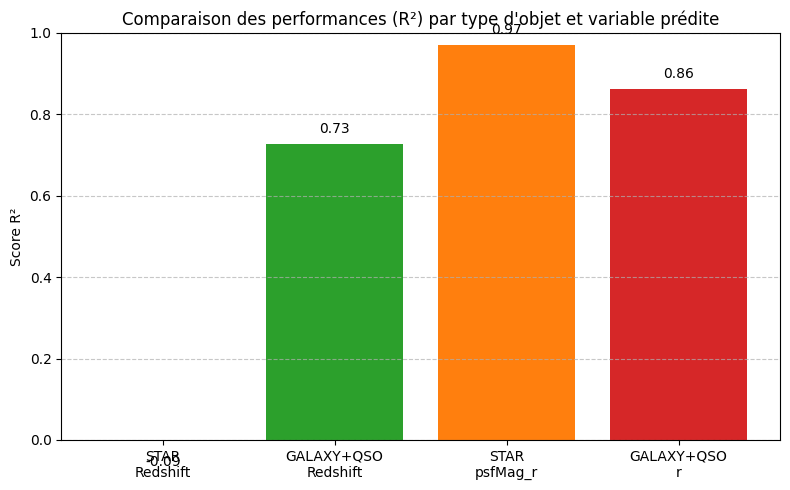

In [21]:
import matplotlib.pyplot as plt

# Comparaison des performances : R² pour chaque modèle
labels = ["STAR\nRedshift", "GALAXY+QSO\nRedshift", "STAR\npsfMag_r", "GALAXY+QSO\nr"]
r2_scores = [
    r2_score(y_test_s_r, y_pred_s_r),
    r2_score(y_test_o_r, y_pred_o_r),
    r2_score(y_test_s_m, y_pred_s_m),
    r2_score(y_test_o_m, y_pred_o_m)
]

# Création du graphique
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, r2_scores, color=["#1f77b4", "#2ca02c", "#ff7f0e", "#d62728"])
plt.ylim(0, 1)
plt.ylabel("Score R²")
plt.title("Comparaison des performances (R²) par type d'objet et variable prédite")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajouter les valeurs sur les barres
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f"{yval:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()


#### Lecture du graphique :

- Le modèle de prédiction de la **magnitude apparente des étoiles** (`psfMag_r`) affiche le **meilleur score R²**, proche de 1, ce qui reflète une excellente précision.
- La **magnitude `r` des galaxies et quasars** est également bien prédite, avec un **R² de 0.86**.
- Le **redshift des galaxies et quasars** est prédit avec un score de **0.73**, ce qui est satisfaisant compte tenu de la complexité du phénomène et de la forte variabilité du redshift dans cette population.

- En revanche, le **score R² pour le redshift des étoiles est très faible**.  
  Cela est **normal** et attendu : les étoiles sont situées dans notre galaxie, donc leur redshift est **quasiment nul et constant** pour toutes les observations.  
  Le modèle n’a donc **aucune vraie variabilité à apprendre**, ce qui explique le **score R² ≈ 0** (même si l'erreur absolue est faible).

Dans ce cas, le score R² ne reflète pas une erreur du modèle, mais plutôt une **limitation naturelle liée à la physique du phénomène**.
